In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
dating_df = pd.read_csv('../../data/fraud.csv')

In [5]:
dating_df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
5,2019-01-01 00:26:22,3598215285024754,fraud_Heidenreich PLC,grocery_pos,207.36,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,f246ac27c09429ff1e385d4683c79c4d,1325377582,40.202538,-73.859212,0
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,Margaret,Curtis,F,742 Oneill Shore,Florence,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,7bb25a43205191eb7344282b88fc54d3,1325377665,31.939812,-90.726209,0
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,...,39.7562,-98.4462,242,Tourism officer,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,1325377849,40.332519,-99.062962,0
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,...,38.9999,-109.6150,46,"Surveyor, minerals",1987-04-23,47238da5b40d126c8abea40a857c7809,1325377911,39.807313,-109.348294,0
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,...,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,1325378050,48.682111,-122.719904,0


In [6]:
# 컬럼명 변경
dating_df.rename(columns={"dob": "birthday", "trans_date_trans_time": "trans_time"}, inplace=True)

In [7]:
dating_df.head(10)

,trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,birthday,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
5,2019-01-01 00:26:22,3598215285024754,fraud_Heidenreich PLC,grocery_pos,207.36,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,f246ac27c09429ff1e385d4683c79c4d,1325377582,40.202538,-73.859212,0
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,Margaret,Curtis,F,742 Oneill Shore,Florence,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,7bb25a43205191eb7344282b88fc54d3,1325377665,31.939812,-90.726209,0
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,...,39.7562,-98.4462,242,Tourism officer,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,1325377849,40.332519,-99.062962,0
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,...,38.9999,-109.6150,46,"Surveyor, minerals",1987-04-23,47238da5b40d126c8abea40a857c7809,1325377911,39.807313,-109.348294,0
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,...,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,1325378050,48.682111,-122.719904,0


In [8]:
dating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_time  491134 non-null  object 
 1   cc_num      491134 non-null  int64  
 2   merchant    491134 non-null  object 
 3   category    491134 non-null  object 
 4   amt         491134 non-null  float64
 5   first       491134 non-null  object 
 6   last        491134 non-null  object 
 7   gender      491134 non-null  object 
 8   street      491134 non-null  object 
 9   city        491134 non-null  object 
 10  state       491134 non-null  object 
 11  zip         491134 non-null  int64  
 12  lat         491134 non-null  float64
 13  long        491134 non-null  float64
 14  city_pop    491134 non-null  int64  
 15  job         491134 non-null  object 
 16  birthday    491134 non-null  object 
 17  trans_num   491134 non-null  object 
 18  unix_time   491134 non-null  int64  
 19  me

In [9]:
dating_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [ ]:
# 위에 정보로 볼때 amt는 거래금액에서 특정 패턴 있을수 있다.
# 특정 category에서 특정패턴 가능성
# trans_date_trans_time 특정시간대로 검토 필요
# unix_time : 거래시간을 숫자로 표현 > 시계열 분석
# merchant,merch_lat, merch_long : 거래장소, 샾, 거리기반 이상 탐지 필요
# gender, dob(생년월일) 성별,연령대 분포 검토 필요
# is_fraud : 사기유무 검토 필요 > 분류 모델

In [10]:
dating_df.columns

Index(['trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'birthday', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

In [11]:
for i in dating_df.columns:
    print(i)

trans_time
cc_num
merchant
category
amt
first
last
gender
street
city
state
zip
lat
long
city_pop
job
birthday
trans_num
unix_time
merch_lat
merch_long
is_fraud


In [ ]:
# 데이터 전처리 (날짜변환, 불필요한 컬럼을 제거, 최소 2개 이상의 새로운 피처(변수)

In [12]:
# 날짜 변환 (datetime 형식으로 변경)
dating_df["trans_time"] = pd.to_datetime(dating_df["trans_time"])
dating_df["birthday"] = pd.to_datetime(dating_df["birthday"])

In [16]:
print(dating_df.dtypes)

trans_time    datetime64[ns]
cc_num                 int64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
birthday      datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


In [15]:
# 삭제할 컬럼 리스트 : 개인 정보이거나 거래번호로 의미없음삭제후 중간에 데이터를 다시 로드 하니 이미 컬럼이 삭제되있음.
columns_to_drop = ["first", "last"]  #추가 컬럼 삭제  zip, stree는 위도, 경도와 중복 데이터 
# 새로운 데이터프레임으로 저장
new_df = dating_df.drop(columns=columns_to_drop)

In [17]:
print(new_df.dtypes)

trans_time    datetime64[ns]
cc_num                 int64
merchant              object
category              object
amt                  float64
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
birthday      datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


In [18]:
columns_to_drop = ["zip", "street"]  #추가 컬럼 삭제  zip, stree는 위도, 경도와 중복 데이터 
# 새로운 데이터프레임으로 저장
renew_df = new_df.drop(columns=columns_to_drop)

In [19]:
print(renew_df.dtypes)

trans_time    datetime64[ns]
cc_num                 int64
merchant              object
category              object
amt                  float64
gender                object
city                  object
state                 object
lat                  float64
long                 float64
city_pop               int64
job                   object
birthday      datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


In [20]:
print(renew_df["state"].value_counts())

TX    49621
MI    28451
NY    23368
PA    20458
WA    19691
AL    18967
NC    18957
AR    17518
SC    16062
IL    16054
CA    16050
MD    15339
FL    15336
WV    15309
MO    12413
IN    12408
KS    11670
LA    11653
NM    10960
AZ     8749
MS     8735
NJ     8039
MN     8037
OH     8034
VT     8030
KY     8024
TN     7305
WI     7304
VA     7297
NV     4386
UT     4386
CT     4382
ND     4381
NE     4378
IA     4375
CO     4375
ME     4374
MT     4365
SD     3660
MA     3652
OK     3651
GA     3646
WY     3643
ID     3641
Name: state, dtype: int64


In [ ]:
# A. 데이터 로드 및 구조확인 및 결측치 확인 필요한 컬럼명변경 및 생성, 이상치 처리
# B. 데이터 전처리(개인정보, 중복데이터 정리, 날짜데이터 변환, 거리 변수 생성(고객 과 가맹점거리)
# C. 범주형 데이터 인코딩
# D. 수치형 데이터 표준화
# E. category, state는 One-Hot Encoding적용
# F. 금액(amt)과 거리는 정규화
# G. 클래스 불균형 해결
# ===== C1조원들 회의결과 =======
# zip, lat, long, street 는 lat, long로 가능해서 zip, stree는 삭제하는 의견
# lat, long 와 merch_lat, merch_long의 두 곳의 위치로 거리가 나오므로 상관관계 파악 가능
# dob 생년월일이므로 최신거래년도와의 차이로 대략적인 나이를 개산하여 age로 새로운 컬럼으로 생성
# State는 위도,경도로 가능하지만, 주별로 사기 발생빈도를 알수 있으므로 제거 안함.또한 주별 사기방지 정책이 다를수 있으므로 제거 안함.
# 직업별, 성별, 연령별 파악가능
# 머신러닝 만드는 1.목적을 생각하고 2최적에 데이터를 준비하는것이 목적 

In [22]:
max_time = renew_df["trans_time"].max() #birthday와의 날자계산으로 age컬럼 생성하기 위해
print("가장 최근 거래 시간:", max_time)

가장 최근 거래 시간: 2020-12-31 23:59:34


In [23]:
# 기준 날짜 설정
reference_date = pd.to_datetime("2020-12-31")
# birthday 컬럼을 datetime 형식으로 변환
renew_df["birthday"] = pd.to_datetime(dating_df["birthday"])
# 나이 계산 (연도 차이 계산)
renew_df["age"] = reference_date.year - renew_df["birthday"].dt.year
# 결과 확인
print(renew_df.head())

           trans_time               cc_num                           merchant  \
0 2019-01-01 00:00:44         630423337322    fraud_Heller, Gutmann and Zieme   
1 2019-01-01 00:12:34  4956828990005111019  fraud_Schultz, Simonis and Little   
2 2019-01-01 00:17:16      180048185037117                  fraud_Kling-Grant   
3 2019-01-01 00:20:15      374930071163758              fraud_Deckow-O'Conner   
4 2019-01-01 00:23:41     2712209726293386             fraud_Balistreri-Nader   

      category     amt gender         city state      lat      long  city_pop  \
0  grocery_pos  107.23      F       Orient    WA  48.8878 -118.2105       149   
1  grocery_pos   44.71      M    Elizabeth    NJ  40.6747  -74.2239    124967   
2  grocery_net   46.28      F   Plainfield    NJ  40.6152  -74.4150     71485   
3  grocery_pos   64.09      M      Romulus    MI  42.2203  -83.3583     31515   
4     misc_pos   25.58      F  Baton Rouge    LA  30.4066  -91.1468    378909   

                          

In [28]:
# 새로운 데이터프레임 new_distance_df에 거리 계산된 컬럼을 추가하여 저장
import pandas as pd
import numpy as np

# 지구 반경 (km)
R = 6371  

# 위도, 경도를 라디안으로 변환  (고객과 가맹점의 두위치로 거리 계산)
lat1, lon1 = np.radians(renew_df["lat"]), np.radians(renew_df["long"])
lat2, lon2 = np.radians(renew_df["merch_lat"]), np.radians(renew_df["merch_long"])

# Haversine 공식 적용
dlat = lat2 - lat1
dlon = lon2 - lon1
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

# 거리 계산 (km) 및 새로운 데이터프레임에 저장
new_distance_df = renew_df.copy()
new_distance_df["distance"] = R * c

# 거리 계산 결과 일부 출력
print(new_distance_df[["lat", "long", "merch_lat", "merch_long", "distance"]].head(10))  # 상위 10개 데이터 확인

       lat      long  merch_lat  merch_long   distance
0  48.8878 -118.2105  49.159047 -118.186462  30.212176
1  40.6747  -74.2239  40.079588  -74.848087  84.702120
2  40.6152  -74.4150  40.021888  -74.228188  67.847742
3  42.2203  -83.3583  42.360426  -83.552316  22.303906
4  30.4066  -91.1468  29.737426  -90.853194  79.591943
5  40.6729  -73.5365  40.202538  -73.859212  59.003381
6  32.1530  -90.1217  31.939812  -90.726209  61.710124
7  39.7562  -98.4462  40.332519  -99.062962  82.843722
8  38.9999 -109.6150  39.807313 -109.348294  92.658366
9  48.3400 -122.3456  48.682111 -122.719904  46.982545


In [29]:
print(new_distance_df.head())

           trans_time               cc_num                           merchant  \
0 2019-01-01 00:00:44         630423337322    fraud_Heller, Gutmann and Zieme   
1 2019-01-01 00:12:34  4956828990005111019  fraud_Schultz, Simonis and Little   
2 2019-01-01 00:17:16      180048185037117                  fraud_Kling-Grant   
3 2019-01-01 00:20:15      374930071163758              fraud_Deckow-O'Conner   
4 2019-01-01 00:23:41     2712209726293386             fraud_Balistreri-Nader   

      category     amt gender         city state      lat      long  city_pop  \
0  grocery_pos  107.23      F       Orient    WA  48.8878 -118.2105       149   
1  grocery_pos   44.71      M    Elizabeth    NJ  40.6747  -74.2239    124967   
2  grocery_net   46.28      F   Plainfield    NJ  40.6152  -74.4150     71485   
3  grocery_pos   64.09      M      Romulus    MI  42.2203  -83.3583     31515   
4     misc_pos   25.58      F  Baton Rouge    LA  30.4066  -91.1468    378909   

                          

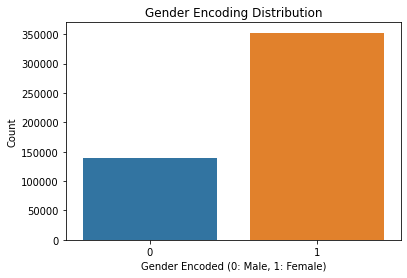

,trans_time,cc_num,merchant,category,amt,gender,city,state,lat,long,...,job,birthday,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,distance,gender_encoded
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,42,30.212176,1
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,Elizabeth,NJ,40.6747,-74.2239,...,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,40,84.702120,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,Plainfield,NJ,40.6152,-74.4150,...,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,46,67.847742,1
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,Romulus,MI,42.2203,-83.3583,...,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,49,22.303906,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,Baton Rouge,LA,30.4066,-91.1468,...,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,43,79.591943,1


In [31]:
# gender 컬럼을 수치형으로 변환 (0: Male, 1: Female)
new_distance_df["gender_encoded"] = new_distance_df["gender"].replace({"M": 0, "F": 1}).infer_objects()

# 결과 확인 (Jupyter Notebook 환경에서 사용)
import matplotlib.pyplot as plt
import seaborn as sns

# gender_encoded 분포 시각화
plt.figure(figsize=(6,4))
sns.countplot(x=new_distance_df["gender_encoded"])
plt.xlabel("Gender Encoded (0: Male, 1: Female)")
plt.ylabel("Count")
plt.title("Gender Encoding Distribution")
plt.show()

# 데이터프레임 미리보기
new_distance_df.head()

In [32]:
# gender 컬럼 삭제
new_distance_df.drop(columns=["gender"], inplace=True)
# 데이터프레임 확인
new_distance_df.head()

,trans_time,cc_num,merchant,category,amt,city,state,lat,long,city_pop,job,birthday,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,distance,gender_encoded
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,42,30.212176,1
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Elizabeth,NJ,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,40,84.702120,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Plainfield,NJ,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,46,67.847742,1
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Romulus,MI,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,49,22.303906,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,43,79.591943,1


In [ ]:
# is_fraud를 기준으로 그래프 시각화

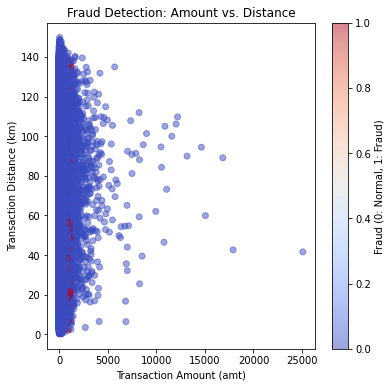

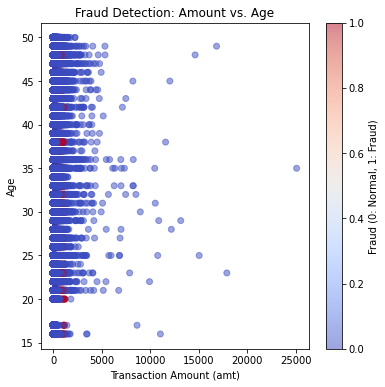

In [33]:
import matplotlib.pyplot as plt

# 거래 금액(amt)과 거리(distance)를 기준으로 사기 거래 여부(is_fraud) 시각화
plt.figure(figsize=(6, 6))
plt.scatter(new_distance_df["amt"], new_distance_df["distance"], c=new_distance_df["is_fraud"], cmap="coolwarm", alpha=0.5)
plt.xlabel("Transaction Amount (amt)")
plt.ylabel("Transaction Distance (km)")
plt.title("Fraud Detection: Amount vs. Distance")
plt.colorbar(label="Fraud (0: Normal, 1: Fraud)")
plt.show()

# 거래 금액(amt)과 연령(age)를 기준으로 사기 거래 여부(is_fraud) 시각화
plt.figure(figsize=(6, 6))
plt.scatter(new_distance_df["amt"], new_distance_df["age"], c=new_distance_df["is_fraud"], cmap="coolwarm", alpha=0.5)
plt.xlabel("Transaction Amount (amt)")
plt.ylabel("Age")
plt.title("Fraud Detection: Amount vs. Age")
plt.colorbar(label="Fraud (0: Normal, 1: Fraud)")
plt.show()

In [ ]:
# 신용거래 이상탐지 데이터 분석 회고
# 데이터를 정리하고 전처리하는 과정에서, 단순히 머신러닝 모델을 돌리는 것이 아니라 
# 데이터의 의미를 제대로 이해하는 것이 중요하다는 점을 다시 한 번 느꼈다.
# 1. 데이터 전처리의 어려움과 중요성
# 처음에는 단순히 gender, state, category 같은 범주형 데이터를 변환하고, distance(거래 거리)를 계산하는 정도로 끝날 거라 생각했다.
#  하지만 직접 하다보니,birthday에서 나이(age)를 계산하는 과정에서 데이터 타입 오류가 발생했고,
# geopy를 사용하여 고객과 가맹점 간 거리를 계산하려 했으나, 모듈이 없거나 실행 환경에 따라 오류가 발생하는 문제가 있었다.
# 그래서 geopy를 사용하지 않고하는 방법을 GPT에 물어 대체해야 했다.
# 이 과정에서 "데이터 전처리가 데이터 분석의 80%"라는 말을 몸소 실감했다.
# 데이터를 깔끔하게 정리하는 것이 모델 학습보다 더 어렵고 중요하다는 것을 다시 깨닫게 되었다.
# 2. 머신러닝 최적화를 위한 고민
# 데이터를 다듬고 나니, 어떤 컬럼을 유지하고 어떤 컬럼을 제거할지 고민이 됐다.
# 특히 state(주) 컬럼을 유지할지 여부를 두고 고민했는데,
# 위도(lat), 경도(long)가 더 정밀한 위치 정보를 제공하기 때문에 state를 삭제하는 것이 더 효율적일 수도 있다는 결론을 내렸다.
# 하지만 state별 사기 거래 비율이 다를 경우에는 중요한 피처가 될 수도 있기 때문에, 반드시 EDA(탐색적 데이터 분석) 후에 결정해야 한다는 점도 배웠다.
# 이 과정에서 "데이터를 무조건 줄이기보다, 데이터가 모델에 어떻게 영향을 미칠지를 먼저 고민하는 것이 중요하다"는 점을 다시 한 번 느꼈다.
# 3. 반복되는 오류와의 싸움
# 오늘은 특히 많은 오류와 씨름하는 하루였으며,데이터가 로드되지 않거나,특정 모듈(geopy, ace_tools)이 실행되지 않거나,
# 머신러닝 모델을 돌릴 때 데이터 타입 문제가 발생하거나...
# 이런 오류가 발생할 때마다 원인을 찾고 수정하는 과정에서 디버깅 능력이 정말 중요하다는 걸 다시금 실감했다.
# 한 줄의 코드가 오류 없이 실행되기까지, 그 뒤에는 수많은 실험과 시행착오가 숨어 있다는 걸 깨닫게 된 하루였습니다.